# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [3]:
A1, b1 = main.random_matrix_Ab(10)
A2, b2 = main.diag_dominant_matrix_A_b(10)
A3, b3 = main.symmetric_matrix_A_b(10)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [88]:
# Funkcja solve
if A1.shape[0] == A1.shape[1]:
    result = np.linalg.solve(A1, b1)
    norm = main.residual_norm(A1, result, b1)
    print(norm)

2.032201911969635e-13


In [5]:
%%timeit -n 1000 -r 10 -p 4
result = np.linalg.solve(A1, b1)
norm = main.residual_norm(A1, result, b1)

34.44 µs ± 8.087 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [61]:
# Funkcja solve_jacobi
if main.is_diag_dominant(A1):
    iter  = [i+1 for i in range(50)]
    x_init = np.zeros((10, 1))
    error = []
    for i in iter:
        result, end = main.solve_jacobi(A1, b1, x_init, maxiter=i, epsilon=2.2e-16)
        error.append(main.residual_norm(A1, result, b1))
    plt.scatter(iter, error)
    plt.title("Metoda Jacobiego")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Norma residuum")
    plt.yscale('log')
    plt.grid()
    plt.show()
else:
    print("Macierz nie spełnia wymagań")

Macierz nie spełnia wymagań


Macierz nie jest diagonalnie dominująca, więc nie spełnia ona warunków metody Jacobiego.


In [20]:
# Metoda gradientów sprzężonych
error = []
def callback_1(X):
    error.append(np.linalg.norm(b1 - A1 @ X))

if main.is_symmetric(A1) and np.all(np.linalg.eigvals(A1) > 0):
    result, bool= sp.sparse.linalg.cg(A1, b1, maxiter=15, callback=callback_1, atol=2.2e-16)
    print(f"Zbieżność rozwiązania - {bool}")
    m = len(error)
    x = np.arange(1, m + 1, 1)
    plt.scatter(x, error)
    plt.title("Metoda gradientów sprzężonych")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Norma residuum")
    plt.yscale('log')
    plt.grid()
    plt.show()
else:
    print("Macierz nie spełnia wymagań")   

Macierz nie spełnia wymagań


Macierz nie jest symetryczna i dodatnio określona, więc nie spełnia warunków metody gradientów sprzężonych.

Zbieżność rozwiązania - 0


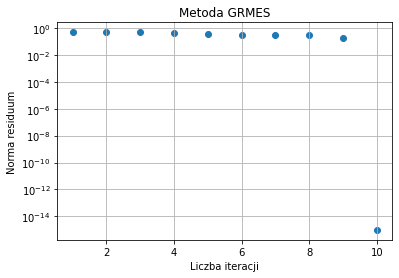

In [60]:
# Algorytm GMRES
error = []
def callback_1(X):
    error.append(X)

result, bool = sp.sparse.linalg.gmres(A1, b1, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')
print(f"Zbieżność rozwiązania - {bool}")
length = len(error)
x = [i + 1 for i in range(length)]
plt.scatter(x, error)
plt.title("Metoda GRMES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.yscale('log')
plt.grid()
plt.show()


Wraz ze zwiększaniem iteracji, dokładność nieznacznie rośnie, aż do pewnego momentu (10), gdzie dokładność znacząco rośnie.

601 µs ± 201 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
812 µs ± 282 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
735 µs ± 355 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
664 µs ± 263 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
502 µs ± 142 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
608 µs ± 201 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
485 µs ± 167 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
604 µs ± 208 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
529 µs ± 103 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


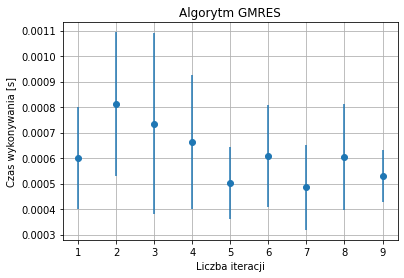

In [75]:
time = []
err = []
for i in range(1, 10):
    average_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A1, b1, maxiter=i, atol=2.2e-16)
    time.append(average_time.average)
    err.append(average_time.stdev)
x = [i for i in range(1, 10)]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.title("Algorytm GMRES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()


Czas wykonywania algorytmu jest względnie stały, oscyluje według pewnej prostej

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [89]:
# Funkcja solve
if A2.shape[0] == A2.shape[1]:
    result = np.linalg.solve(A2, b2)
    norm = main.residual_norm(A2, result, b2)
    print(norm)

2.220446049250313e-15


In [11]:
%%timeit -n 1000 -r 10 -p 4
result = np.linalg.solve(A2, b2)
norm = main.residual_norm(A2, result, b2)

28.63 µs ± 7.306 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


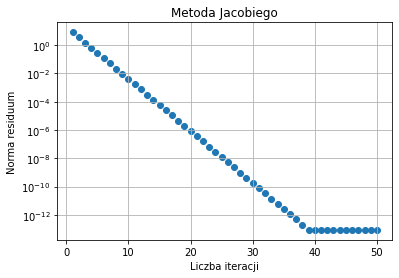

In [62]:
# Funkcja solve_jacobi
if main.is_diag_dominant(A2):
    iter  = [i+1 for i in range(50)]
    x_init = np.zeros((10, 1))
    error = []
    for i in iter:
        result, end = main.solve_jacobi(A2, b2, x_init, maxiter=i, epsilon=2.2e-16)
        error.append(main.residual_norm(A2, result, b2))
    plt.scatter(iter, error)
    plt.title("Metoda Jacobiego")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Norma residuum")
    plt.yscale('log')
    plt.grid()
    plt.show()
else:
    print("Macierz nie spełnia wymagań")

Dokładność metody Jacobiego zwiększa się, aż do pewnej wartości iteracji (około 38), gdzie ustala się ona na pewnym poziomie.

417 µs ± 64.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
435 µs ± 141 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
763 µs ± 288 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.06 ms ± 268 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.02 ms ± 225 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
924 µs ± 255 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
942 µs ± 183 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.09 ms ± 221 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.16 ms ± 147 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


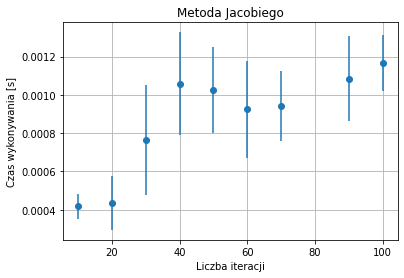

In [77]:
time = []
err = []
size = [10, 20, 30, 40, 50, 60, 70, 90, 100]
x_init = np.zeros((10, 1))
for i in size:
    average_time = %timeit -r 5 -n 10 -o main.solve_jacobi(A2, b2,x_init, maxiter=i, epsilon=2.2e-16)
    time.append(average_time.average)
    err.append(average_time.stdev)

plt.errorbar(size, time, yerr=err, linestyle="None", marker="o")
plt.title("Metoda Jacobiego")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()

Czas wykonywania rośnie wraz ze wzrostem liczby iteracji.

In [66]:
# Metoda gradientów sprzężonych
error = []
def callback_1(X):
    error.append(np.linalg.norm(b2 - A2 @ X))

if main.is_symmetric(A2) and np.all(np.linalg.eigvals(A2) > 0):
    result, bool= sp.sparse.linalg.cg(A2, b2, maxiter=15, callback=callback_1, atol=2.2e-16)
    print(f"Zbieżność rozwiązania - {bool}")
    m = len(error)
    x = np.arange(1, m + 1, 1)
    plt.scatter(x, error)
    plt.title("Metoda gradientów sprzężonych")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Norma residuum")
    plt.yscale('log')
    plt.grid()
    plt.show()
else:
    print("Macierz nie spełnia wymagań")      

Macierz nie spełnia wymagań


Macierz nie jest symetryczna i dodatnio określona, więc nie spełnia warunków metody gradientów sprzężonych.

Zbieżność rozwiązania - 0


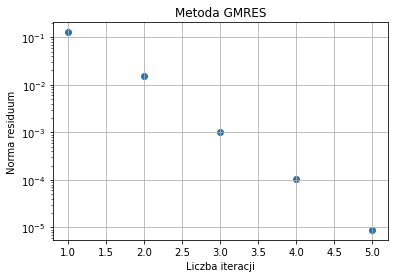

In [48]:
# Algorytm GMRES
error = []
def callback_1(X):
    error.append(X)

result, bool = sp.sparse.linalg.gmres(A2, b2, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')
print(f"Zbieżność rozwiązania - {bool}")
length = len(error)
x = [i + 1 for i in range(length)]
plt.scatter(x, error)
plt.title("Metoda GMRES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.yscale('log')
plt.grid()
plt.show()


Wraz ze wzrostem liczby iteracji, rośnie dokładność

496 µs ± 169 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
358 µs ± 132 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
418 µs ± 140 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
630 µs ± 173 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
446 µs ± 112 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
450 µs ± 136 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
401 µs ± 60.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
377 µs ± 94.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
385 µs ± 167 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


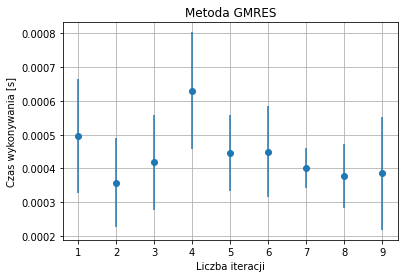

In [84]:
time = []
err = []
for i in range(1,10):
    average_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=i, atol=2.2e-16)
    time.append(average_time.average)
    err.append(average_time.stdev)
x = [i for i in range(1,10)]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GMRES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")
plt.show()


Czas wykonywania algorytmu jest względnie stały

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [17]:
# Funkcja solve
if A3.shape[0] == A3.shape[1]:
    result = np.linalg.solve(A3, b3)
    norm = main.residual_norm(A3, result, b3)
    print(norm)

2.8118247496203583e-14


In [18]:
%%timeit -n 1000 -r 10 -p 4
result = np.linalg.solve(A3, b3)
norm = main.residual_norm(A3, result, b3)

35.31 µs ± 14.26 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [51]:
# Funkcja solve_jacobi
if main.is_diag_dominant(A3):
    iter  = [i+1 for i in range(50)]
    x_init = np.zeros((10, 1))
    error = []
    for i in iter:
        result, end = main.solve_jacobi(A3, b3, x_init, maxiter=i, epsilon=2.2e-16)
        error.append(main.residual_norm(A3, result, b3))
    plt.scatter(iter, error)
    plt.title("Metoda Jacobiego")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Norma residuum")
    plt.yscale('log')
    plt.grid()
    plt.show()
else:
    print("Macierz nie spełnia wymagań")

Macierz nie spełnia wymagań


Macierz nie jest diagonalnie dominująca, więc nie spełnia ona warunków metody Jacobiego.

Zbieżność rozwiązania - 0


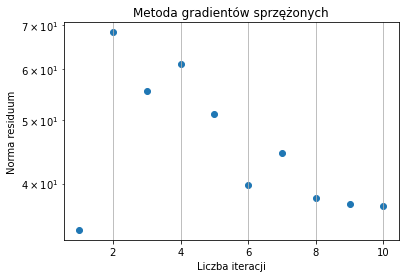

In [52]:
# Metoda gradientów sprzężonych
error = []
def callback_1(X):
    error.append(np.linalg.norm(b3 - A3 @ X))

if main.is_symmetric(A3):
    result, bool= sp.sparse.linalg.cg(A3, b3, maxiter=15, callback=callback_1, atol=2.2e-16)
    print(f"Zbieżność rozwiązania - {bool}")
    m = len(error)
    x = np.arange(1, m + 1, 1)
    plt.scatter(x, error)
    plt.title("Metoda gradientów sprzężonych")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Norma residuum")
    plt.yscale('log')
    plt.grid()
    plt.show()
else:
    print("Macierz nie spełnia wymagań")   

Skorzystanie z metody gradientów sprzężonych było możliwe, ponieważ macierz jest dodatnio określona (wszystkie minory są dodatnie)

162 µs ± 69.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
174 µs ± 37.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
247 µs ± 45.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
563 µs ± 144 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
538 µs ± 190 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
532 µs ± 161 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
478 µs ± 117 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
551 µs ± 159 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
528 µs ± 130 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


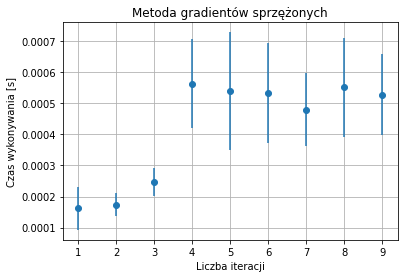

In [85]:
time = []
err = []
for i in range(1,10):
    average_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.cg(A3, b3, maxiter=i, atol=2.2e-16)
    time.append(average_time.average)
    err.append(average_time.stdev)

x = [i for i in range(1,10)]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.title("Metoda gradientów sprzężonych")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()

Wraz ze wzrostem liczby iteracji, rośnie czas wykonywania się metody gradientów sprzężonych.

Zbieżność rozwiązania - 0


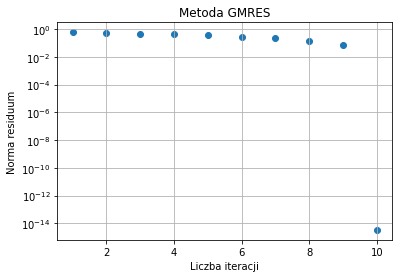

In [57]:
# Algorytm GMRES
error = []
def callback_1(X):
    error.append(X)

result, bool = sp.sparse.linalg.gmres(A3, b3, maxiter=15, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')
print(f"Zbieżność rozwiązania - {bool}")
length = len(error)
x = [i + 1 for i in range(length)]
plt.scatter(x, error)
plt.title("Metoda GMRES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.yscale('log')
plt.grid()
plt.show()


Podobnie jak w zadaniu 5, wraz ze wzrostem iteracji, dokładność nieznacznie rośnie, aż do pewnego momentu (10), gdzie dokładność znacząco rośnie.

678 µs ± 205 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
786 µs ± 248 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
684 µs ± 271 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
566 µs ± 167 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
572 µs ± 138 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
588 µs ± 110 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
563 µs ± 149 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
676 µs ± 154 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
574 µs ± 44 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


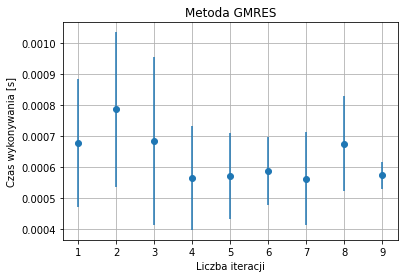

In [87]:
time = []
err = []
for i in range(1,10):
    average_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A3, b3, maxiter=i, atol=2.2e-16)
    time.append(average_time.average)
    err.append(average_time.stdev)

x = [i for i in range(1,10)]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.title("Metoda GMRES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()



Czas wykonywania jest względnie stały.

Wnioski: 

Zapoznano się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Rozwiązano 3 zadane układy równań (wszystkie stworzono używając wcześniej zaimplementowanych funkcji) czterema metodami:

- funkcją solve z biblioteki numpy

- zaimplementowaneną iteracyjną metodą solve_jacobi

- iteracyjną metodą gradientów sprzężonych z biblioteki scipy

- iteracyjną metodą GMRES z biblioteki scipy

Przed każdą metodą sprawdzono, czy warunki dotyczące macierzy dla danej metody są spełnione. Ponadto, zbadano dokładność (przy pomocy funkcji resiual_norm z poprzednich laboratoriów) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstawiono na wykresach.


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)